In [ ]:
# SANTANDER PROJECT

In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow-2.0.0b1-py3.7-win-amd64.egg\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow-2.0.0b1-py3.7-win-amd64.egg\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow-2.0.0b1-py3.7-win-amd64.egg\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 =

In [2]:
# Set working directory
os.chdir("C:/Users/risha/Desktop/Edwisor Project/Project Santander")

In [3]:
# Checking current  working directory
os.getcwd()

'C:\\Users\\risha\\Desktop\\Edwisor Project\\Project Santander'

In [4]:
# Load Data training data
santander_train = pd.read_csv('train.csv')

# EXPLORATORY DATA ANALYSIS

In [5]:
# Checking the shape of Data
santander_train.shape

(200000, 202)

In [6]:
# Checking the info of the Dataset
santander_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
type(santander_train)

pandas.core.frame.DataFrame

In [8]:
# santander_train.dtypes (To check the Data Type of each variable in the DataSet)

In [8]:
santander_train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
santander_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# DATA PREPROCESSING

In [10]:
# Checking the missing value in the DataFrame
missing_val = pd.DataFrame(santander_train.isnull().sum())

In [15]:
missing_val

In [11]:
# So there is no missing value since the sum of missing value column is 0
missing_val[0].sum()

0

In [12]:
# Outlier Analysis
df = santander_train.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x2389f272e48>,
 'caps': [<matplotlib.lines.Line2D at 0x2389f28d7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2389f272cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x2389f28de80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2389f28df60>],
 'means': []}

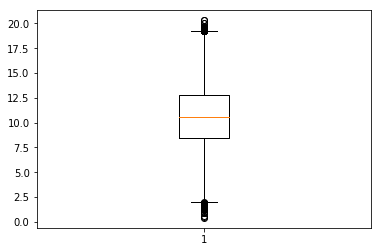

In [13]:
# Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(santander_train['var_0'])
# Similiar Boxplots can be plotted for other variables too

In [14]:
cnames = santander_train.columns
cnames

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [15]:
# Calculating outliers and inliers in each variable
for i in range(2,202):
    #print(i)
    q75 = np.percentile(santander_train.iloc[:,i],75)
    q25 = np.percentile(santander_train.iloc[:,i],25)
    iqr = q75 - q25

# Calculating inter quartile range

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    #print(min)
    #print(max)

# Drop those observations which are beyond outliers and inliers
    
    santander_train = santander_train.drop(santander_train[santander_train.iloc[:,i] < min].index)
    santander_train = santander_train.drop(santander_train[santander_train.iloc[:,i] > max].index)

In [16]:
# Checking again the shape of Dataset after removing outliers
santander_train.shape

(175073, 202)

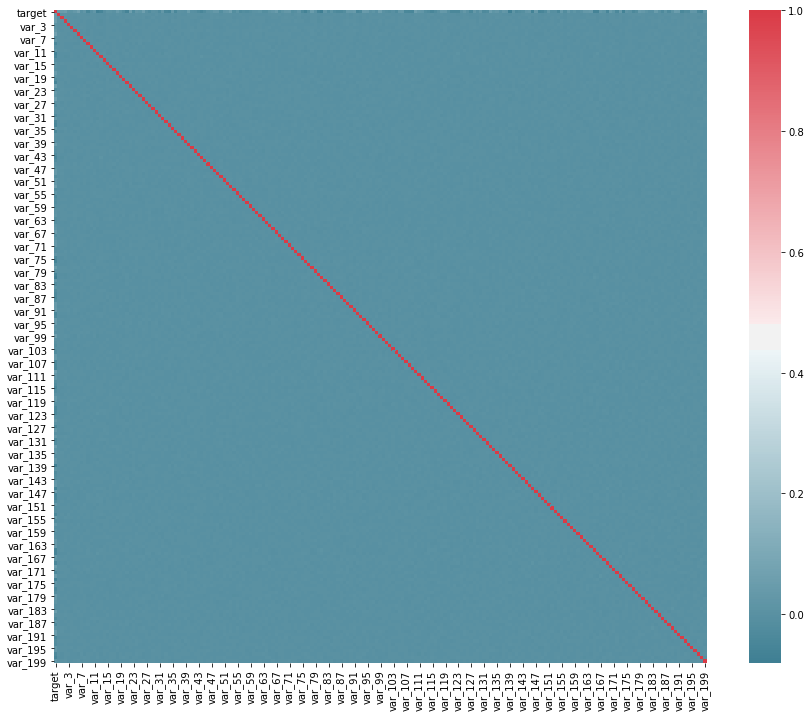

In [17]:
### Feature Selection
## Correlation analysis for continuous variables of DataFrame Santander_train

# Generate Correlation Matrix
corr = santander_train.corr()

# Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(15, 12))

# Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
# As can be seen from the above correlation plot that there is no correlation between the continuous variables so there is no need to drop any variable from the Dataset

# Since our DataFrame does not contain any categorical variable so there is no need to do Chi square test for feature selection

In [18]:
## Feature Scaling

df = santander_train.copy()
# marketing_train = df.copy()

(array([  14.,   35.,   47.,   55.,   73.,   75.,   84.,  103.,  155.,
         165.,  212.,  239.,  260.,  318.,  328.,  413.,  462.,  551.,
         596.,  662.,  791.,  835.,  941., 1027., 1117., 1292., 1353.,
        1409., 1519., 1632., 1741., 1873., 1897., 2066., 2032., 2136.,
        2286., 2387., 2367., 2627., 2548., 2588., 2674., 2604., 2844.,
        2939., 2851., 2876., 3043., 2983., 3085., 3267., 3176., 3304.,
        3306., 3435., 3275., 3216., 3361., 3314., 3247., 3244., 3318.,
        3291., 3243., 3157., 3098., 3009., 3008., 2881., 2825., 2840.,
        2640., 2521., 2461., 2400., 2252., 2294., 2113., 1873., 1854.,
        1771., 1622., 1487., 1356., 1275., 1187., 1091., 1065.,  963.,
         897.,  919.,  781.,  710.,  635.,  593.,  488.,  430.,  342.,
         266.,  219.,  168.,   93.,   63.,   77.,   48.,   30.,   25.,
          17.,   11.,    7.,    4.]),
 array([-15.5597   , -15.2761625, -14.992625 , -14.7090875, -14.42555  ,
        -14.1420125, -13.858475 , -13

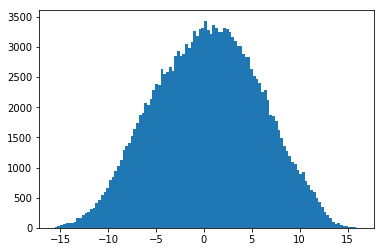

In [19]:
# Normality check
%matplotlib inline  
plt.hist(santander_train['var_10'], bins='auto')

In [ ]:
# Since by checking different variables we come to know that our data is Normally distributed but we are going to use Normalization method of Feature Scaling since it is easier to calculate

In [20]:
# Nomalisation
for i in range(2,202):
    #print(i)
    santander_train.iloc[:,i] = (santander_train.iloc[:,i] - np.min(santander_train.iloc[:,i]))/(np.max(santander_train.iloc[:,i]) - np.min(santander_train.iloc[:,i]))

In [21]:
santander_train.head(5)
# Now we can see that are data is scaled in proper range after applying Normalization Technique of scaling

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,0.402177,0.292074,0.584832,0.360750,0.541944,0.428616,0.445950,0.599229,...,0.549167,0.306125,0.647331,0.424194,0.521838,0.221894,0.678981,0.432931,0.312817,0.535268
2,train_2,0,0.383803,0.458737,0.596195,0.589273,0.449393,0.432917,0.815398,0.401589,...,0.489941,0.641196,0.469241,0.423963,0.685452,0.916032,0.236337,0.377654,0.427523,0.558635
3,train_3,0,0.526233,0.483233,0.389996,0.532375,0.660389,0.588981,0.592615,0.416839,...,0.550375,0.350931,0.353519,0.412187,0.761405,0.363140,0.346810,0.755756,0.619349,0.411073
4,train_4,0,0.455137,0.510803,0.648538,0.486814,0.627993,0.681244,0.612404,0.630015,...,0.319733,0.625720,0.248002,0.758362,0.243878,0.332878,0.557507,0.608396,0.620985,0.414044
5,train_5,0,0.550401,0.476370,0.630965,0.649151,0.489398,0.705195,0.327156,0.431645,...,0.133260,0.457854,0.909096,0.368492,0.331889,0.651596,0.325396,0.657678,0.301038,0.477651


In [ ]:
## Standarisation:Since our Data is Normally distributed we can apply Standardisation too
# for i in range(3,202):
#     print(i)
#     santander_train.iloc[:,i] = (santander_train.iloc[:,i] - np.mean(santander_train[:,i])/np.std(santander_train[:,i])

# MODEL DEVELOPMENT

In [22]:
# Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [23]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [24]:
# Replace target variable categories with Yes or No
santander_train['target'] = santander_train['target'].replace(0, 'No')
santander_train['target'] = santander_train['target'].replace(1, 'Yes')

In [25]:
# Converted entries of 'target' variable from o/1 to No/Yes
santander_train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,No,0.402177,0.292074,0.584832,0.360750,0.541944,0.428616,0.445950,0.599229,...,0.549167,0.306125,0.647331,0.424194,0.521838,0.221894,0.678981,0.432931,0.312817,0.535268
2,train_2,No,0.383803,0.458737,0.596195,0.589273,0.449393,0.432917,0.815398,0.401589,...,0.489941,0.641196,0.469241,0.423963,0.685452,0.916032,0.236337,0.377654,0.427523,0.558635
3,train_3,No,0.526233,0.483233,0.389996,0.532375,0.660389,0.588981,0.592615,0.416839,...,0.550375,0.350931,0.353519,0.412187,0.761405,0.363140,0.346810,0.755756,0.619349,0.411073
4,train_4,No,0.455137,0.510803,0.648538,0.486814,0.627993,0.681244,0.612404,0.630015,...,0.319733,0.625720,0.248002,0.758362,0.243878,0.332878,0.557507,0.608396,0.620985,0.414044
5,train_5,No,0.550401,0.476370,0.630965,0.649151,0.489398,0.705195,0.327156,0.431645,...,0.133260,0.457854,0.909096,0.368492,0.331889,0.651596,0.325396,0.657678,0.301038,0.477651


In [26]:
# Divide data into train and test for model Development
X = santander_train.values[:, 2:202]
Y = santander_train.values[:,1]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [ ]:
# DECISION TREE

In [27]:
# Model Development
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [28]:
# Predict new test cases
C50_Predictions = C50_model.predict(X_test)

In [29]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix 

In [30]:
CM = confusion_matrix(y_test, C50_Predictions)

In [31]:
# To get confusion matrix in tabular form
CM = pd.crosstab(y_test, C50_Predictions)

In [32]:
CM

col_0,No,Yes
row_0,,
No,28716,2791
Yes,2815,693


In [59]:
from sklearn import metrics

In [61]:
metrics.roc_auc_score(y_test, C50_Predictions)

In [94]:
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test,C50_Predictions))

              precision    recall  f1-score   support

          No       0.91      0.91      0.91     31626
         Yes       0.18      0.19      0.19      3389

    accuracy                           0.84     35015
   macro avg       0.55      0.55      0.55     35015
weighted avg       0.84      0.84      0.84     35015



In [97]:
# Check accuracy of model
#accuracy_score(y_test, C50_Predictions)*100
((TP+TN)*100)/(TP+TN+FP+FN)

83.82978723404256

In [ ]:
# Accuracy = 84.1886

In [ ]:
# RANDOM FOREST

In [39]:
# Import Libraries
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Develop and train random forest model
RF_model = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)

In [42]:
# Predict new test cases
RF_Predictions = RF_model.predict(X_test)

In [43]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix 
CM = confusion_matrix(y_test, RF_Predictions)

In [44]:
# To get confusion matrix in tabular form
CM = pd.crosstab(y_test, RF_Predictions)

In [45]:
CM

col_0,No,Yes
row_0,,
No,31471,39
Yes,3451,54


In [46]:
print(classification_report(y_test,RF_Predictions))

              precision    recall  f1-score   support

          No       0.90      1.00      0.95     31510
         Yes       0.58      0.02      0.03      3505

    accuracy                           0.90     35015
   macro avg       0.74      0.51      0.49     35015
weighted avg       0.87      0.90      0.86     35015



In [45]:
metrics.roc_auc_score(y_test , RF_Predictions)

In [47]:
# Let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [48]:
# Check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

90.03284306725689

In [ ]:
# Accuracy = 90.2219

In [ ]:
# LOGISTIC REGRESSION

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
predictions = logmodel.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.92      0.99      0.95     31510
         Yes       0.69      0.26      0.37      3505

    accuracy                           0.91     35015
   macro avg       0.81      0.62      0.66     35015
weighted avg       0.90      0.91      0.90     35015



In [66]:
# Build confusion matrix
confusion_matrix(y_test,predictions)

array([[31113,   397],
       [ 2607,   898]], dtype=int64)

In [67]:
# To get confusion matrix in tabular form
CM = pd.crosstab(y_test,predictions)
CM

col_0,No,Yes
row_0,,
No,31113,397
Yes,2607,898


In [51]:
metrics.roc_auc_score(y_test , predictions)

In [68]:
# Let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [69]:
# Check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

91.42081964872197

In [ ]:
# Accuracy = 91.54

In [ ]:
#KNN K NEAREST NEIGHBOUR

In [ ]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier

In [118]:
# Train KNN model
KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)

In [ ]:
# Predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [ ]:
# Build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

# Let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

# Check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)


In [ ]:
# NAIVE BAYES

In [70]:
# Import Libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [71]:
# Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [72]:
# Predict test cases
NB_Predictions = NB_model.predict(X_test)

In [73]:
print(classification_report(y_test,NB_Predictions))

              precision    recall  f1-score   support

          No       0.93      0.98      0.96     31510
         Yes       0.72      0.36      0.48      3505

    accuracy                           0.92     35015
   macro avg       0.83      0.67      0.72     35015
weighted avg       0.91      0.92      0.91     35015



In [74]:
print(confusion_matrix(y_test,NB_Predictions))

[[31027   483]
 [ 2259  1246]]


In [75]:
# Build confusion matrix in tabular form
CM = pd.crosstab(y_test, NB_Predictions)
CM

col_0,No,Yes
row_0,,
No,31027,483
Yes,2259,1246


In [49]:
metrics.roc_auc_score(y_test , C50_Predictions)

In [76]:
# Let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [77]:
# Check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

92.16907039840069

In [ ]:
# Accuracy = 92.42

# SUMMARY

*PRECISION CRITERIA IS AS FOLLOWS:
 Random forest> Naive Bayes> Logistic Regression> Decision tree

*RECALL CRITERIA IS AS FOLLOWS:
 Naive Bayes> Logistic Regression> Decision tree> Random forest

*AUC CRITERIA IS AS FOLLOWS:
 Naive Bayes> Logistic Regression> Decision tree> Random forest


ERRORS:

*LOGISTIC REGRESSION:
 Recall = 26.3435
 Precision = 69.0573
 AUC = 62.53%
 Accuracy = 92%
 
*DECISION TREE:
 Recall = 19.53
 Precision = 19.17
 AUC = 54.89%
 Accuracy = 84%
 
*RANDOM FOREST:
 n_estimators = 100
 Recall = 0.0195
 Precision = 100.0
 AUC = 50.00%
 Accuracy = 90%
 
*NAIVE BAYES:
 Recall = 35.8608
 Precision = 72.0455
 AUC = 67.08%
 Accuracy = 92%
 
*KNN:
 Took a very long time to compute results hence no results derived
 

"To get the most accurate model out of various models the value of recall, precision, AUC should be high".
As per the directions of our project we have to predict the results based on recall, precision and accuracy 
of all machine learning algorithm. Out of all the above developed Machine Learning algorithms we can deduce 
that "Naive Bayes" is giving all the quantities highest among all other algorithms. Hence "Naive Bayes" is 
selected to predict target variable from our given test data.

# FINDING THE TARGET VALUE OF TEST DATA

In [ ]:
# Now since we have tested all the Machine Learning Algorithms and Statistical Models on our Training Data and retrieved the accuracy from each model 
# So we choose Naive Bayes method of Supervised Learning to predict the value of our target variable on our test Data

In [78]:
# Load Data testing data
santander_test = pd.read_csv('test.csv')

In [79]:
santander_test.shape

(200000, 201)

In [80]:
# Since this test data it does not contain target variable which we have to predict
santander_test.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [98]:
# Drop the ID_code column from the Dataset as our model is not trained for it
santander_test = santander_test.drop(['ID_code'], axis=1)

In [99]:
santander_test.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [ ]:
# Now we apply our model to Naive Bayes to predict our target variable

In [101]:
santander_test['target_pred'] = NB_model.predict(santander_test)

In [102]:
santander_test.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target_pred
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,Yes
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,Yes
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,Yes
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,Yes
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,Yes


In [ ]:
# Our 'target_pred' column gets added to as the last column of the dataset

In [110]:
# Now writing this new dataset wit predicted variable as a CSV file
santander_test.to_csv('santander_test_predict.csv',index=False)

# THANKYOU